In [1]:
import flowermd
import hoomd
import gsd
import matplotlib.pyplot as plt
import numpy as np
import freud
import time

/home/jbieri/miniforge3/envs/flowerMD/lib/python3.11/site-packages/mdtraj/formats/__init__.py:13: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  from mdtraj.formats.trr import TRRTrajectoryFile


In [2]:
traj = gsd.hoomd.open('pps-melt.gsd')
nematic = freud.order.Nematic()

In [3]:
def nop(frame):
    # Get the positional data of all atoms
    positions = frame.particles.position
    # Get the number of molecules
    molecule_ids = frame.bonds.group
    # Assigning the first atoms position to temp variable
    temp = positions[0]
    # Initialize list of vectors
    vectors = []
    # Loop through all atoms with counter i
    for i, pos in enumerate(positions):
        # Check to see if all atoms have been counted
        if i < len(molecule_ids):
            # Addding the vector difference between current and previous atom positions
            # np.stack allows for them to be treated as arrays
            vectors.append(np.stack(pos) - np.stack(temp))
            # Updating temp variable for the next cycle
            temp = pos
            # Converting the list into an array, ignoring the first one
    vectors = np.array(vectors[1:])
    return vectors

In [19]:
# METHOD 1
# Starting timer to see how long this process takes
start = time.process_time()
orders = []
frames = []
count = 0
# Iterate through every frame in the trajectory
for frame in traj:
    # Appending the count to assign the frame a number
    count += 1
    frames.append(count)
    # Computing the S2 order parameter based off of the nop function of the frame
    nematic.compute(nop(frame))
    # Appending the order of the frame for plotting purposes
    orders.append(nematic.order)
    print("Nematic Order Parameter:", nematic.order)
print("Time taken:", time.process_time() - start, "s")

Nematic Order Parameter: 0.5017987489700317
Nematic Order Parameter: 0.4803151786327362
Nematic Order Parameter: 0.47533345222473145
Nematic Order Parameter: 0.5050491690635681
Nematic Order Parameter: 0.48896536231040955
Nematic Order Parameter: 0.4670295715332031
Nematic Order Parameter: 0.49086785316467285
Nematic Order Parameter: 0.48236843943595886
Nematic Order Parameter: 0.4618638753890991
Nematic Order Parameter: 0.48225095868110657
Nematic Order Parameter: 0.4785265624523163
Nematic Order Parameter: 0.45778888463974
Nematic Order Parameter: 0.47117894887924194
Nematic Order Parameter: 0.46891987323760986
Nematic Order Parameter: 0.44634348154067993
Nematic Order Parameter: 0.4542243480682373
Nematic Order Parameter: 0.45586150884628296
Nematic Order Parameter: 0.43665772676467896
Nematic Order Parameter: 0.44050711393356323
Nematic Order Parameter: 0.44255927205085754
Nematic Order Parameter: 0.42562422156333923
Nematic Order Parameter: 0.42673155665397644
Nematic Order Parame

/home/jbieri/miniforge3/envs/flowerMD/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/home/jbieri/miniforge3/envs/flowerMD/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/home/jbieri/miniforge3/envs/flowerMD/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


Text(0.5, 1.0, 'Method 1')

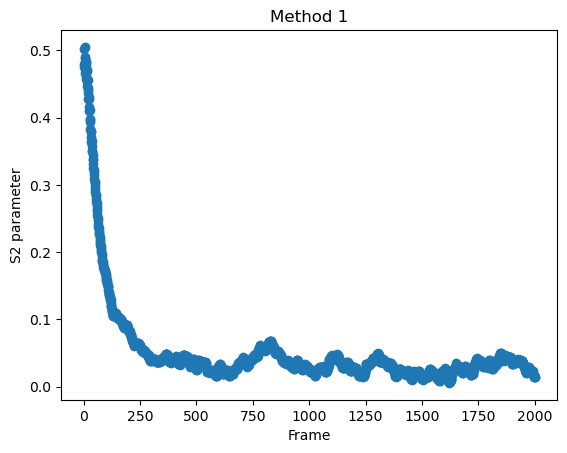

In [5]:
plt.scatter(frames, orders)
plt.xlabel("Frame")
plt.ylabel("S2 parameter")
plt.title("Method 1")

In [6]:
# METHOD 2
orders = []
frames = []
# Starting timer to see how long this process takes
start = time.process_time()
count = 0
# Iterate through every frame in the trajectory
for frame in traj:
    count += 1
    # Appending the count to assign the frame a number
    frames.append(count)
    # Getting the positions of every atom
    positions = frame.particles.position
    # Computing the S2 order parameter based off of that
    nematic.compute(positions)
    # Appending the order of the frame for plotting purposes
    orders.append(nematic.order)
print("Time taken:", time.process_time() - start, "s")

Time taken: 13.5810228 s


Text(0.5, 1.0, 'Method 2')

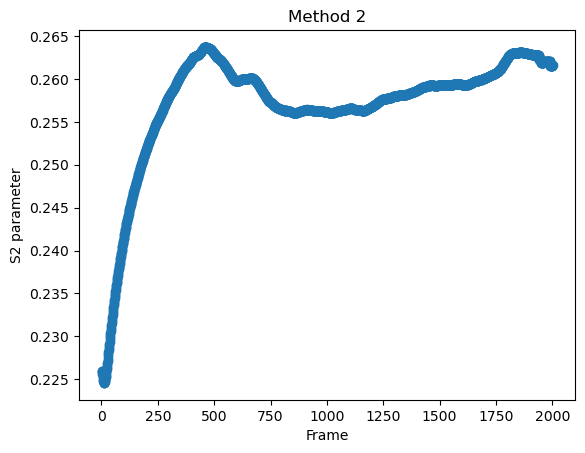

In [8]:
plt.scatter(frames, orders)
plt.xlabel("Frame")
plt.ylabel("S2 parameter")
plt.title("Method 2")

In [20]:
# METHOD 3

nematic = freud.order.Nematic()

def compute_vectors(positions, molecule_ids):
    # Initialize list of vectors
    vectors = []
    for mol_id in np.unique(molecule_ids):
        # Get the indices for atoms in the current molecule
        indices = np.where(molecule_ids == mol_id)[0]
        # Compute vectors only within the current molecule
        for i in range(len(indices) - 1):
            pos1 = positions[indices[i]]
            pos2 = positions[indices[i + 1]]
            vectors.append(pos2 - pos1)
    # Convert the list into a numpy array
    vectors = np.array(vectors)
    return vectors

def nop(frame):
    # Get the positional data of all atoms
    positions = frame.particles.position
    # Get the molecule IDs (assuming frame.bonds.group provides molecule IDs)
    molecule_ids = frame.bonds.group
    # Compute the vectors within molecules
    vectors = compute_vectors(positions, molecule_ids)
    return vectors

# Starting timer to see how long this process takes
start = time.process_time()
orders1 = []
frames = []
count = 0

# Iterate through every frame in the trajectory
for frame in traj:
    count += 1
    frames.append(count)
    # Compute the nematic order parameter based on the vectors from the nop function
    vectors = nop(frame)
    nematic.compute(vectors)
    # Append the order of the frame for plotting purposes
    orders1.append(nematic.order)
    print("Nematic Order Parameter:", nematic.order)

print("Time taken:", time.process_time() - start, "s")

Nematic Order Parameter: 0.5017987489700317
Nematic Order Parameter: 0.480315238237381
Nematic Order Parameter: 0.47533345222473145
Nematic Order Parameter: 0.5050491690635681
Nematic Order Parameter: 0.48896536231040955
Nematic Order Parameter: 0.4670296311378479
Nematic Order Parameter: 0.4908677935600281
Nematic Order Parameter: 0.48236843943595886
Nematic Order Parameter: 0.4618639349937439
Nematic Order Parameter: 0.48225098848342896
Nematic Order Parameter: 0.47852659225463867
Nematic Order Parameter: 0.45778894424438477
Nematic Order Parameter: 0.47117894887924194
Nematic Order Parameter: 0.46891987323760986
Nematic Order Parameter: 0.44634345173835754
Nematic Order Parameter: 0.45422446727752686
Nematic Order Parameter: 0.45586150884628296
Nematic Order Parameter: 0.4366576671600342
Nematic Order Parameter: 0.44050708413124084
Nematic Order Parameter: 0.44255930185317993
Nematic Order Parameter: 0.42562422156333923
Nematic Order Parameter: 0.42673149704933167
Nematic Order Para

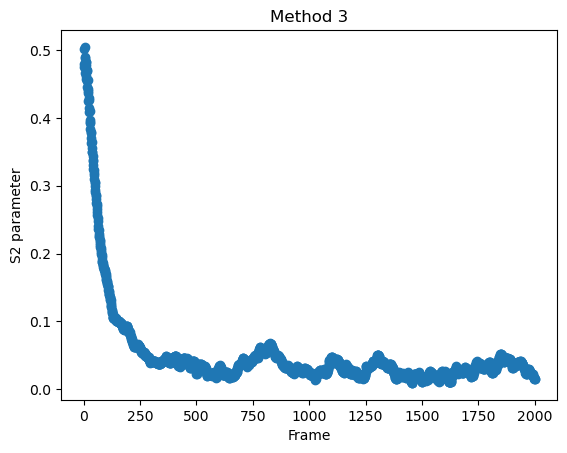

In [21]:
# Plot results
plt.scatter(frames, orders1)
plt.xlabel("Frame")
plt.ylabel("S2 parameter")
plt.title("Method 3")
plt.show()


In [30]:
comparison = np.array(orders1) != np.array(orders)
print(np.sum(comparison))

1668
